## Unit 6 | Assignment - What's the Weather Like?


## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

## Hints and Considerations

* You may want to start this assignment by refreshing yourself on 4th grade geography, in particular, the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm). 

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* Though we've never worked with the [citipy Python library](https://pypi.python.org/pypi/citipy), push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

## Copyright

Coding Boot Camp (C) 2016. All Rights Reserved.

In [343]:
from citipy import citipy
import json
import requests
import random
import pandas as pd
from config import api_key 
import time
import matplotlib.pyplot as plt

In [361]:
random_lat = []
random_lon = []
cities = []
for x in range(1500):
    random_lat.append(random.randint(-79,79))
    random_lon.append(random.randint(-79,79))
    city=citipy.nearest_city(random_lat[x],random_lon[x]).city_name
    cities.append(city)

data ={"city":cities,
       "Latitude": random_lat,
       "Longitudes":random_lon
        }
data=pd.DataFrame(data)
data=data.drop_duplicates('city')


In [371]:
url = "http://api.openweathermap.org/data/2.5/weather?"
count=1000000
expected_key = 'main'
City_list=data['city'].values.tolist()
while count>500:
    for city in City_list:
        query_url = url + "appid=" + api_key + "&q=" +city +"&units=metric"
        print(city +' : '+ query_url)
        json_weather = requests.get(query_url).json()
        time.sleep(0.1)
        list_of_keys=list(json_weather.keys())
        if ex in list_of_keys:
            data.loc[data['city']==city, 'Humidity']=json_weather['main']['humidity']
            data.loc[data['city']==city, 'Cloudiness']=json_weather['clouds']['all']
            data.loc[data['city']==city, 'Temperature']=json_weather['main']['temp']
            data.loc[data['city']==city, 'Wind Speed']=json_weather['wind']['speed']
    data=data.dropna(how='any')
    count = len(data)

laguna : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=laguna&units=metric
hermanus : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=hermanus&units=metric
ushuaia : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=ushuaia&units=metric
kinango : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=kinango&units=metric
nouakchott : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=nouakchott&units=metric
bulawayo : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=bulawayo&units=metric
salalah : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=salalah&units=metric
souillac : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=souillac&units=metric
mabaruma : http://api.openweathermap.o

port elizabeth : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=port elizabeth&units=metric
lucapa : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=lucapa&units=metric
iznoski : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=iznoski&units=metric
westport : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=westport&units=metric
ibra : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=ibra&units=metric
mercedes : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=mercedes&units=metric
quatre cocos : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=quatre cocos&units=metric
balsas : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=balsas&units=metric
maniitsoq : http://api.openwea

sawakin : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=sawakin&units=metric
coruripe : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=coruripe&units=metric
castro : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=castro&units=metric
ugoofaaru : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=ugoofaaru&units=metric
stepnyak : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=stepnyak&units=metric
saint anthony : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=saint anthony&units=metric
upernavik : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=upernavik&units=metric
bud : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=bud&units=metric
ayagoz : http://api.openweathermap

chhabra : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=chhabra&units=metric
mogadishu : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=mogadishu&units=metric
ilhabela : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=ilhabela&units=metric
qaqortoq : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=qaqortoq&units=metric
lodja : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=lodja&units=metric
constantine : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=constantine&units=metric
llangefni : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=llangefni&units=metric
sur : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=sur&units=metric
caluquembe : http://api.openweathermap.o

manicore : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=manicore&units=metric
emba : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=emba&units=metric
kaduy : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=kaduy&units=metric
kanjiza : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=kanjiza&units=metric
novyye burasy : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=novyye burasy&units=metric
myre : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=myre&units=metric
idah : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=idah&units=metric
le port : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=le port&units=metric
bocaiuva : http://api.openweathermap.org/data/2.5/weathe

abonnema : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=abonnema&units=metric
presidencia roque saenz pena : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=presidencia roque saenz pena&units=metric
nara : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=nara&units=metric
shahr-e babak : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=shahr-e babak&units=metric
marzuq : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=marzuq&units=metric
biaora : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=biaora&units=metric
matay : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=matay&units=metric
novoagansk : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=novoagansk&units=metric


bowmore : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=bowmore&units=metric
ankazobe : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=ankazobe&units=metric
vazhiny : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=vazhiny&units=metric
lardos : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=lardos&units=metric
chute-aux-outardes : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=chute-aux-outardes&units=metric
gbarnga : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=gbarnga&units=metric
jizan : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=jizan&units=metric
roald : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=roald&units=metric
ust-kulom : http://api.openweather

yarmouth : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=yarmouth&units=metric
tessalit : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=tessalit&units=metric
folldal : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=folldal&units=metric
calbuco : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=calbuco&units=metric
osypenko : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=osypenko&units=metric
borujerd : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=borujerd&units=metric
robertsport : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=robertsport&units=metric
skjervoy : http://api.openweathermap.org/data/2.5/weather?appid=10d0846be514ee091d88e5d96b229f00&q=skjervoy&units=metric
tazovskiy : http://api.openwea

In [373]:
data.to_csv('./weather.csv')


500

In [395]:
len(data)

500

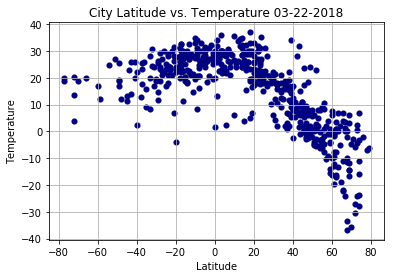

In [389]:
plt.scatter(data["Latitude"],data["Temperature"], c='darkblue',edgecolors='black', linewidths=0.1)
plt.title("City Latitude vs. Temperature 03-22-2018")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.savefig('lat.png')
plt.show()


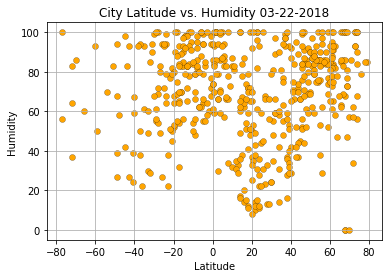

In [388]:
plt.scatter(data["Latitude"],data["Humidity"], c='orange',edgecolors='black', linewidths=0.2)
plt.title("City Latitude vs. Humidity 03-22-2018")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig('Humidity.png')
plt.show()


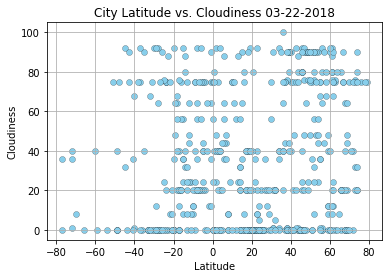

In [393]:
plt.scatter(data["Latitude"],data["Cloudiness"], c='skyblue',edgecolors='black', linewidths=0.2)
plt.title("City Latitude vs. Cloudiness 03-22-2018")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig('Cloudiness.png')
plt.show()


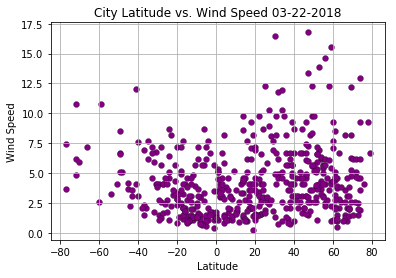

In [394]:
plt.scatter(data["Latitude"],data["Wind Speed"], c='purple',edgecolors='black', linewidths=0.2)
plt.title("City Latitude vs. Wind Speed 03-22-2018")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig('Wind Speed.png')
plt.show()
